In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py
color = sns.color_palette()

import plotly.graph_objs as go
py.init_notebook_mode(connected = True)

import plotly.tools as tls

from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import model_selection
import pickle


import time

In [2]:
df_train = pd.read_csv('C:/Users/L03107259/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/TEC/Research/Galaxies/Notebooks/SDSS16.csv')

In [3]:
df_train

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1237667968033620000,228.674917,19.179460,19.32631,18.82748,18.65659,18.60481,18.60917,5237,301,5,134,4448615345201370000,QSO,0.438182,3951,55681,672
99996,1237664818210470000,173.757382,36.441603,18.33687,17.30365,17.16037,17.14895,17.14419,4504,301,2,111,2265404129658560000,STAR,-0.000497,2012,53493,340
99997,1237664295297290000,205.426531,38.499053,17.50690,15.63152,15.22328,15.04469,15.28668,4382,301,4,97,2257446413900210000,GALAXY,0.004587,2005,53472,62
99998,1237656537513130000,337.135144,-9.635967,19.33946,17.21436,16.29697,15.86745,15.51556,2576,301,2,105,811847537492257000,GALAXY,0.084538,721,52228,268


In [4]:
df_train.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'fiberid'], axis = 1, inplace = True)

df_train.head(3)

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd
0,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,STAR,0.000115,7255,56597
1,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,STAR,-0.000093,8290,57364
2,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,STAR,0.000165,2861,54583


In [5]:
df_train.rename(columns = {'ra':'alpha', 'dec':'delta', 'mjd':'MJD'}, inplace = True)

In [6]:
df_train.isnull().sum()

alpha       0
delta       0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
plate       0
MJD         0
dtype: int64

In [7]:
df_train

,alpha,delta,u,g,r,i,z,class,redshift,plate,MJD
0,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,STAR,0.000115,7255,56597
1,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,STAR,-0.000093,8290,57364
2,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,STAR,0.000165,2861,54583
3,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,GALAXY,0.058155,2002,53471
4,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,GALAXY,0.072210,2123,53793
...,...,...,...,...,...,...,...,...,...,...,...
99995,228.674917,19.179460,19.32631,18.82748,18.65659,18.60481,18.60917,QSO,0.438182,3951,55681
99996,173.757382,36.441603,18.33687,17.30365,17.16037,17.14895,17.14419,STAR,-0.000497,2012,53493
99997,205.426531,38.499053,17.50690,15.63152,15.22328,15.04469,15.28668,GALAXY,0.004587,2005,53472
99998,337.135144,-9.635967,19.33946,17.21436,16.29697,15.86745,15.51556,GALAXY,0.084538,721,52228


C:\Users\L03107259\Anaconda3\envs\Atoany\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='class', ylabel='count'>

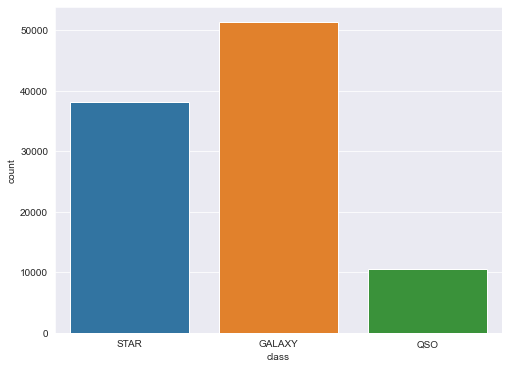

In [8]:
sns.set_style('darkgrid')

plt.figure(figsize = (8,6))

sns.countplot(df_train['class'])

<AxesSubplot:>

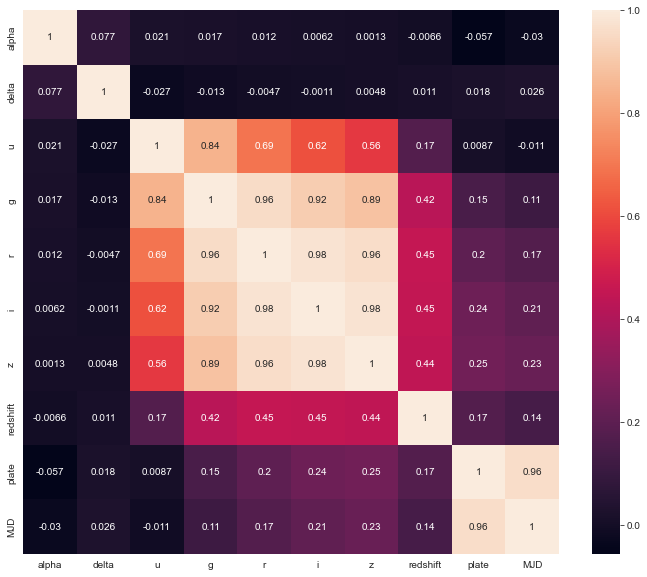

In [9]:
corr = df_train.corr()

plt.figure(figsize = (12,10))

sns.heatmap(corr, annot = True)

In [10]:
labels = {'STAR' :1, 'GALAXY': 2, 'QSO': 3}

df_train.replace({'class':labels}, inplace = True)
df_train.head(3)

,alpha,delta,u,g,r,i,z,class,redshift,plate,MJD
0,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,1,0.000115,7255,56597
1,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,1,-0.000093,8290,57364
2,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,1,0.000165,2861,54583


In [11]:
df2 = df_train.groupby(['class'])['class'].count()
print(df2)

class
1    38096
2    51323
3    10581
Name: class, dtype: int64


In [12]:
X = df_train.drop('class', axis = 1).values
y = df_train['class'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [14]:
robust = RobustScaler()

X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)

In [15]:
len(X_train)

70000

In [16]:
len(X_test)

30000

## Logistic regression

In [17]:
start = time.time()

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

end = time.time()
print(end - start)

#Prediction of test set
y_pred = lr.predict(X_test)

reporte = classification_report(y_test, y_pred)
print(reporte)



CF = confusion_matrix(y_test, y_pred)
df_cf = pd.DataFrame(CF)

df_cf.style.background_gradient()



C:\Users\L03107259\Anaconda3\envs\Atoany\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



4.557223558425903
              precision    recall  f1-score   support

           1       0.97      1.00      0.99     11463
           2       0.99      0.97      0.98     15366
           3       0.96      0.96      0.96      3171

    accuracy                           0.98     30000
   macro avg       0.97      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000



,0,1,2
0,11453,0,10
1,295,14949,122
2,5,124,3042


In [18]:
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)

lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

filename_lr = 'lr_SDSS17_model.sav'
pickle.dump(lr, open(filename_lr, 'wb'))

Training Score:  0.9833142857142857
Testing Score:  0.9814666666666667


## Support Vector Machine

In [19]:
start = time.time()

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

end = time.time()
print(end - start)



y_pred = svc.predict(X_test)

reporte = classification_report(y_test, y_pred)
print(reporte)

CF = confusion_matrix(y_test, y_pred)
df_cf = pd.DataFrame(CF)

df_cf.style.background_gradient()



27.514996767044067
              precision    recall  f1-score   support

           1       0.98      1.00      0.99     11463
           2       0.99      0.98      0.99     15366
           3       0.98      0.95      0.96      3171

    accuracy                           0.99     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.99      0.99      0.99     30000



,0,1,2
0,11463,0,0
1,190,15119,57
2,5,165,3001


In [20]:
start = time.time()

svc = SVC(kernel='poly')
svc.fit(X_train, y_train)

end = time.time()
print(end - start)




y_pred = svc.predict(X_test)

reporte = classification_report(y_test, y_pred)
print(reporte)

CF = confusion_matrix(y_test, y_pred)
df_cf = pd.DataFrame(CF)

df_cf.style.background_gradient()



167.49528312683105
              precision    recall  f1-score   support

           1       0.97      0.80      0.87     11463
           2       0.85      0.98      0.91     15366
           3       0.99      0.90      0.94      3171

    accuracy                           0.90     30000
   macro avg       0.94      0.89      0.91     30000
weighted avg       0.91      0.90      0.90     30000



,0,1,2
0,9115,2348,0
1,283,15051,32
2,3,310,2858


In [22]:
start = time.time()

svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

end = time.time()
print(end - start)

y_pred = svc.predict(X_test)

reporte = classification_report(y_test, y_pred)
print(reporte)

CF = confusion_matrix(y_test, y_pred)
df_cf = pd.DataFrame(CF)

df_cf.style.background_gradient()



16.303219318389893
              precision    recall  f1-score   support

           1       0.98      1.00      0.99     11463
           2       0.99      0.98      0.98     15366
           3       0.99      0.93      0.96      3171

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.98     30000
weighted avg       0.98      0.98      0.98     30000



,0,1,2
0,11459,4,0
1,273,15048,45
2,5,208,2958


In [23]:
start = time.time()

svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)

end = time.time()
print(end - start)

y_pred = svc.predict(X_test)

reporte = classification_report(y_test, y_pred)
print(reporte)

CF = confusion_matrix(y_test, y_pred)
df_cf = pd.DataFrame(CF)

df_cf.style.background_gradient()



48.17405891418457
              precision    recall  f1-score   support

           1       0.84      0.87      0.85     11463
           2       0.80      0.78      0.79     15366
           3       0.54      0.51      0.52      3171

    accuracy                           0.79     30000
   macro avg       0.73      0.72      0.72     30000
weighted avg       0.79      0.79      0.79     30000



,0,1,2
0,10004,1459,0
1,1920,12055,1391
2,49,1505,1617


## KNN

In [24]:
start = time.time()

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

end = time.time()
print(end - start)

y_pred = neigh.predict(X_test)

neigh_train_acc = neigh.score(X_train, y_train)
print('Training Score: ', neigh_train_acc)

neigh_test_acc = neigh.score(X_test, y_test)
print('Testing Score: ', neigh_test_acc)


reporte = classification_report(y_test, y_pred)
print(reporte)

CF = confusion_matrix(y_test, y_pred)
df_cf = pd.DataFrame(CF)

df_cf.style.background_gradient()




0.15795087814331055
Training Score:  0.9795428571428572
Testing Score:  0.9745
              precision    recall  f1-score   support

           1       0.97      0.99      0.98     11463
           2       0.98      0.97      0.98     15366
           3       0.98      0.93      0.96      3171

    accuracy                           0.97     30000
   macro avg       0.98      0.96      0.97     30000
weighted avg       0.97      0.97      0.97     30000



,0,1,2
0,11329,134,0
1,361,14944,61
2,11,198,2962


In [27]:
start = time.time()

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

end = time.time()
print(end - start)

y_pred = neigh.predict(X_test)

neigh_train_acc = neigh.score(X_train, y_train)
print('Training Score: ', neigh_train_acc)

neigh_test_acc = neigh.score(X_test, y_test)
print('Testing Score: ', neigh_test_acc)


reporte = classification_report(y_test, y_pred)
print(reporte)

CF = confusion_matrix(y_test, y_pred)
df_cf = pd.DataFrame(CF)

df_cf.style.background_gradient()




0.15553045272827148
Training Score:  0.9795428571428572
Testing Score:  0.9745
              precision    recall  f1-score   support

           1       0.97      0.99      0.98     11463
           2       0.98      0.97      0.98     15366
           3       0.98      0.93      0.96      3171

    accuracy                           0.97     30000
   macro avg       0.98      0.96      0.97     30000
weighted avg       0.97      0.97      0.97     30000



,0,1,2
0,11329,134,0
1,361,14944,61
2,11,198,2962


## Decision Tree

In [31]:
start = time.time()

dtc = DecisionTreeClassifier(random_state=0, max_depth=10, criterion='entropy')
dtc.fit(X_train, y_train)

end = time.time()
print(end - start)

y_pred = dtc.predict(X_test)


dtc_train_acc = dtc.score(X_train, y_train)
print('Training Score: ', dtc_train_acc)

dtc_test_acc = dtc.score(X_test, y_test)
print('Testing Score: ', dtc_test_acc)


reporte = classification_report(y_test, y_pred)
print(reporte)


CF = confusion_matrix(y_test, y_pred)
df_cf = pd.DataFrame(CF)

df_cf.style.background_gradient()



0.7910463809967041
Training Score:  0.9955
Testing Score:  0.9897
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     11463
           2       0.99      0.99      0.99     15366
           3       0.98      0.94      0.96      3171

    accuracy                           0.99     30000
   macro avg       0.99      0.98      0.98     30000
weighted avg       0.99      0.99      0.99     30000



,0,1,2
0,11434,29,0
1,14,15278,74
2,4,188,2979


In [21]:
filename_dt = 'dt_SDSS17_model.sav'
pickle.dump(dtc, open(filename_dt, 'wb'))

## Random Forest

In [22]:
start = time.time()

rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rf_train_acc = rf.score(X_train, y_train)
print('Training Score: ', rf_train_acc)

rf_test_acc = rf.score(X_test, y_test)
print('Testing Score: ', rf_test_acc)


reporte = classification_report(y_test, y_pred)
print(reporte)


CF = confusion_matrix(y_test, y_pred)
df_cf = pd.DataFrame(CF)

df_cf.style.background_gradient()

end = time.time()
print(end - start)

Training Score:  0.9723
Testing Score:  0.9716666666666667
              precision    recall  f1-score   support

           1       0.99      1.00      0.99     11463
           2       0.97      0.98      0.97     15366
           3       0.94      0.84      0.88      3171

    accuracy                           0.97     30000
   macro avg       0.96      0.94      0.95     30000
weighted avg       0.97      0.97      0.97     30000

4.460823059082031


## Adaboost

In [23]:
start = time.time()

ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)


ada_train_acc = ada.score(X_train, y_train)
print('Training Score: ', ada_train_acc)

ada_test_acc = ada.score(X_test, y_test)
print('Testing Score: ', ada_test_acc)


reporte = classification_report(y_test, y_pred)
print(reporte)


CF = confusion_matrix(y_test, y_pred)
df_cf = pd.DataFrame(CF)

df_cf.style.background_gradient()

end = time.time()
print(end - start)

Training Score:  0.8858714285714285
Testing Score:  0.8856666666666667
              precision    recall  f1-score   support

           1       0.99      0.99      0.99     11463
           2       0.82      0.99      0.90     15366
           3       0.21      0.00      0.00      3171

    accuracy                           0.89     30000
   macro avg       0.67      0.66      0.63     30000
weighted avg       0.82      0.89      0.84     30000

10.911375522613525
